In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import necessary libraries

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from sklearn.naive_bayes import GaussianNB



## Load dataset

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/ML Dataset/online_shoppers_intention.csv")

print(datas)

       Administrative  Administrative_Duration  Informational  ...        VisitorType  Weekend  Revenue
0                   0                      0.0              0  ...  Returning_Visitor    False    False
1                   0                      0.0              0  ...  Returning_Visitor    False    False
2                   0                      0.0              0  ...  Returning_Visitor    False    False
3                   0                      0.0              0  ...  Returning_Visitor    False    False
4                   0                      0.0              0  ...  Returning_Visitor     True    False
...               ...                      ...            ...  ...                ...      ...      ...
12325               3                    145.0              0  ...  Returning_Visitor     True    False
12326               0                      0.0              0  ...  Returning_Visitor     True    False
12327               0                      0.0              0  .

In [8]:
X = datas[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']] # Replace with your actual feature column names
Y = datas['Revenue']

In [10]:
X = df.drop('Revenue', axis=1)  # Replace 'label_column' with the name of your label column
y = df['Revenue']

## Split the datset

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
# Perform label encoding on categorical features in X_train and X_test
categorical_cols = X_train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    # Create a LabelEncoder object for each column to avoid errors
    labelencoder = LabelEncoder()
    X_train[col] = labelencoder.fit_transform(X_train[col])
    X_test[col] = labelencoder.transform(X_test[col]) # Use transform on X_test to avoid data leakage


## Train the Naive Bayes classifier

In [15]:
nb = GaussianNB()
nb.fit(X_train, Y_train)


GaussianNB()

## Make Predictions

In [16]:
y_pred = nb.predict(X_test)


## Evaluate the Model

In [17]:
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.8446877534468775
Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.91      0.91      2055
        True       0.54      0.52      0.53       411

    accuracy                           0.84      2466
   macro avg       0.72      0.71      0.72      2466
weighted avg       0.84      0.84      0.84      2466



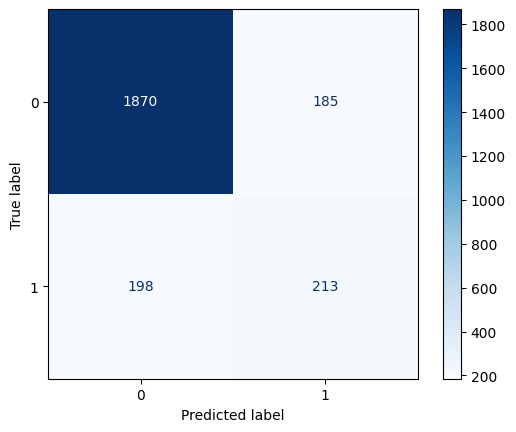

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()
